In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

In [23]:
from src.datamodules.components.odd_reader import ActsReader
import numpy as np
import pandas as pd

In [4]:
inputdir = '/pscratch/sd/x/xju/LLMTracking/acts/run/v2'
outputdir = '../data/odd_raw_data/v2'

In [5]:
reader = ActsReader(inputdir=inputdir,
                    outputdir=outputdir)

total 1000 events in directory: /pscratch/sd/x/xju/LLMTracking/acts/run/v2


In [6]:
reader.read_event(0)

,index,measurement_id,geometry_id,x,y,z,var_r,var_z,umid,hit_id,particle_id,vx,vy,vz,p_pt,p_eta,nhits,r,phi,R
0,0,49813,1801440400704017921,-201.925491,-330.148712,2197.500000,5.756312e+00,4.051085e-33,10349,49813,319796257688125440,-201.293701,-330.006805,2200.000000,0.096615,2.242992,9,387.003974,-2.119716,2.582498
1,1,22170,1224979648400753152,159.249619,62.054855,14.334743,2.041854e-05,2.250000e-04,2491,22170,495533405262315520,164.222824,64.575760,15.278932,0.404886,0.157359,5,170.912978,0.371570,5.655017
2,2,10737,1224979236083784960,-32.999035,-6.522222,-20.489441,8.775257e-05,2.250000e-04,667,10737,684547144769601536,-38.547379,-7.814959,-19.428657,0.490690,0.182982,2,33.637415,-2.946459,5.794873
3,3,19422,1224979510961781248,73.158859,-88.356224,-92.615395,2.101309e-05,2.250000e-04,1690,19422,562949953656193024,77.150490,-92.650147,-93.346474,0.455128,-0.126658,4,114.712863,-0.879214,5.908076
4,4,20641,1224979648400613376,79.068810,151.709717,65.060585,2.211554e-05,2.250000e-04,1945,20641,810647934453415936,82.133965,156.183151,68.187294,0.432359,0.548457,5,171.078096,1.090345,6.259640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65205,65205,8871,1224979236083767296,0.019631,32.189327,31.870542,1.302871e-05,2.250000e-04,598,8871,842173131375247360,-440.629028,1118.324710,-3977.405030,0.937098,-1.921106,15,32.189333,1.570186,4177.098506
65206,65206,8790,1224979236083767040,4.784593,32.763886,-50.224243,6.174025e-05,2.250000e-04,597,8790,689050747936964608,1062.763550,-136.093155,4002.000000,0.323117,1.630918,13,33.111396,1.425789,4191.461975
65207,65207,8378,1224979236083763456,4.621388,31.889194,-52.426357,1.484372e-05,2.250000e-04,583,8378,689050747936964608,1062.763550,-136.093155,4002.000000,0.323117,1.630918,13,32.222321,1.426878,4193.597023
65208,65208,8060,1224979236083760128,24.827419,21.136827,63.046661,3.556489e-05,2.250000e-04,570,8060,860187529398190080,1133.841430,-399.008362,-3959.472660,0.414379,-1.754741,17,32.606230,0.705277,4193.697145


In [7]:
import matplotlib.pyplot as plt

(array([ 32., 297., 696., 727., 716., 540., 445., 328., 243., 198., 159.,
        128.,  93.,  73.,  66.,  41.,  42.,  39.,  28.,  30.,  22.,  29.,
         12.,  17.,  12.,  13.,  10.,   6.,   7.,   3.,   6.,   4.,   7.,
          5.,   4.,   3.,   3.,   3.,   3.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. ]),
 <BarContainer object of 40 artists>)

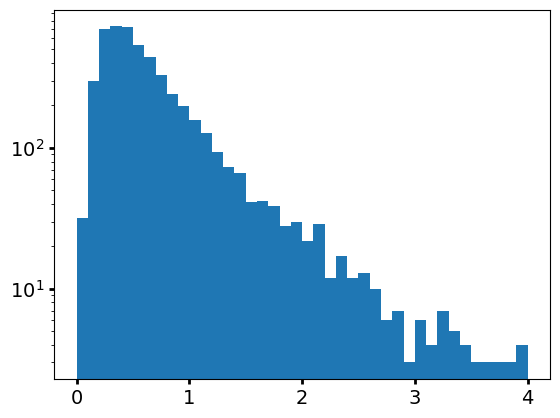

In [16]:
plt.hist(reader.particles.p_pt, bins=40, range=(0, 4), log=True)

In [27]:
reader.particles.p_pt.max()

22.57993746075299

In [17]:
reader.particles.shape

(5128, 15)

In [24]:
all_particle_fname = "/pscratch/sd/x/xju/LLMTracking/acts/run/v2/event000000000-particles.csv"
all_particles = pd.read_csv(all_particle_fname)
pt = np.sqrt(all_particles.px**2 + all_particles.py**2)
eta =

In [28]:
pt = pt[(all_particles['q'] != 0) & (all_particles['p_eta'].abs() < 4)]

(array([1149., 2426., 2518., 2138., 1740., 1233.,  974.,  725.,  489.,
         380.,  298.,  244.,  187.,  133.,  111.,   85.,   84.,   63.,
          56.,   39.,   33.,   50.,   18.,   22.,   21.,   23.,   16.,
          12.,   14.,    6.,    8.,   10.,   12.,    5.,    7.,    6.,
           3.,    4.,    4.,    3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. ]),
 <BarContainer object of 40 artists>)

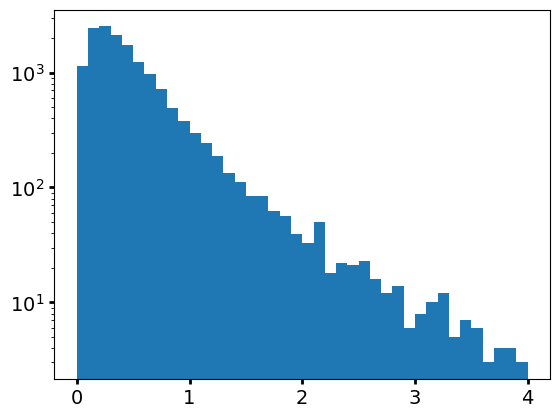

In [29]:
plt.hist(pt, bins=40, range=(0, 4), log=True)

In [31]:
reader.true_edges.shape

(2, 60106)

In [35]:
reader.spacepoints.columns

(20,)

In [34]:
reader.particles.columns

Index(['particle_id', 'particle_type', 'process', 'vx', 'vy', 'vz', 'vt', 'px',
       'py', 'pz', 'm', 'q', 'p_pt', 'p_radius', 'p_eta'],
      dtype='object')